# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** [Aryo DWi Haryanto]
- **Email:** [aryodwi122@gmail.com]
- **ID Dicoding:** [aryo_dwi_h]

## Menentukan Pertanyaan Bisnis

- Apa saja penyebab utama meningkatnya kadar Pm 2.5?

- Bagaimana perkembangan PM2. 5  dari waktu kewaktu (harian , bulanan dan musiman )?

- Bagaimana kebijakan pengendalian
pencemaran yang diterapkan dari tahun 2013-2017 efektif dalam mengurangi PM2. 5?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import os







## Data Wrangling

### Gathering Data

In [2]:
import zipfile, os
from google.colab import files

# Upload ZIP
uploaded = files.upload()
zip_filename = list(uploaded.keys())[0]

# Extract langsung ke /content
with zipfile.ZipFile(zip_filename, 'r') as z:
    z.extractall("/content")

print("Daftar folder & file di /content:")
print(os.listdir("/content"))

Saving Air-quality-dataset.zip to Air-quality-dataset.zip
Daftar folder & file di /content:
['.config', 'PRSA_Data_20130301-20170228', 'Air-quality-dataset.zip', 'sample_data']


In [3]:
data_folder = "/content/PRSA_Data_20130301-20170228"
print("Isi folder dataset:")
print(os.listdir(data_folder))

csv_files = [os.path.join(data_folder, f)
            for f in os.listdir(data_folder) if f.endswith('.csv')]

print(f"Jumlah file CSV yang ditemukan: {len(csv_files)}")

df_list = [pd.read_csv(f) for f in csv_files]
df = pd.concat(df_list, ignore_index=True)

print("Dataset berhasil digabung:")
print(df.head())
print(df.shape)




Isi folder dataset:
['PRSA_Data_Nongzhanguan_20130301-20170228.csv', 'PRSA_Data_Guanyuan_20130301-20170228.csv', 'PRSA_Data_Huairou_20130301-20170228.csv', 'PRSA_Data_Shunyi_20130301-20170228.csv', 'PRSA_Data_Wanliu_20130301-20170228.csv', 'PRSA_Data_Gucheng_20130301-20170228.csv', 'PRSA_Data_Changping_20130301-20170228.csv', 'PRSA_Data_Dongsi_20130301-20170228.csv', 'PRSA_Data_Aotizhongxin_20130301-20170228.csv', 'PRSA_Data_Tiantan_20130301-20170228.csv', 'PRSA_Data_Wanshouxigong_20130301-20170228.csv', 'PRSA_Data_Dingling_20130301-20170228.csv']
Jumlah file CSV yang ditemukan: 12
Dataset berhasil digabung:
   No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    5.0  14.0  4.0  12.0  200.0  85.0  -0.5   
1   2  2013      3    1     1    8.0  12.0  6.0  14.0  200.0  84.0  -0.7   
2   3  2013      3    1     2    3.0   6.0  5.0  14.0  200.0  83.0  -1.2   
3   4  2013      3    1     3    5.0   5.0  5.0  14.0  200.0  84.0  -1.4   
4   

**Insight:**


*   Dataset terdiri dari 12 stasiun di beijing
*   Data polutan utama terdiri dari (PM2.5, PM10, NO2, SO2, CO, O3)








### Assessing Data

In [4]:
print(df.info())
print(df.describe())
print("Missing values per column")
print(df.isnull().sum())
print("Duplikasi baris:", df.duplicated().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 57.8+ MB
None
                  No           year     

**Insight:**
- Dataset besar, detail dan bagus cocok untuk analisis polusi jangka panjang
- Missing data cukup signifikan pada polutan


*   Rata-rata polusi jauh diatas standar WHO, kualitas udara china buruk
*  Data cuca lengkap



### Cleaning Data

In [5]:
df = df.reset_index(drop=True)
df["datetime"] = pd.to_datetime(df[["year", "month", "day", "hour"]], errors="coerce")
df.dropna(subset=["datetime"])
df = df.sort_values(by="datetime").set_index("datetime")
df.fillna(df.median(numeric_only=True))
cat_cols = df.select_dtypes(include="object").columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

df = df[~df.index.duplicated(keep="last")]
print("\nDataset setelah cleaning:")

print(df.head())




Dataset setelah cleaning:
                     No  year  month  day  hour  PM2.5  PM10   SO2   NO2  \
datetime                                                                   
2013-03-01 00:00:00   1  2013      3    1     0    3.0   6.0   3.0   8.0   
2013-03-01 01:00:00   2  2013      3    1     1    4.0   4.0   3.0   NaN   
2013-03-01 02:00:00   3  2013      3    1     2    8.0   8.0   NaN  16.0   
2013-03-01 03:00:00   4  2013      3    1     3    5.0   5.0   5.0  14.0   
2013-03-01 04:00:00   5  2013      3    1     4    3.0   3.0  14.0   8.0   

                        CO    O3  TEMP    PRES  DEWP  RAIN   wd  WSPM  \
datetime                                                                
2013-03-01 00:00:00  300.0  44.0  -0.9  1025.8 -20.5   0.0   NW   9.3   
2013-03-01 01:00:00  100.0  92.0  -2.7  1020.8 -20.5   0.0  NNW   1.5   
2013-03-01 02:00:00  200.0  59.0  -0.6  1022.6 -19.7   0.0  WNW   4.7   
2013-03-01 03:00:00  200.0  84.0  -1.4  1026.2 -25.5   0.0    N   4.9   
20

**Insight:**
- Datetime berhasil dibuat dan digunakan sebagai index
- Missing value numeric diisi median
- Missing value kategori diisi mode


*   Duplikasi timestamp dihapus
*   Dataset sudah rapi, lengkap dan siap analisis



## Exploratory Data Analysis (EDA)

### Explore ...

In [6]:
pollutants = ["PM2.5", "PM10", "NO2", "SO2", "CO", "O3"]

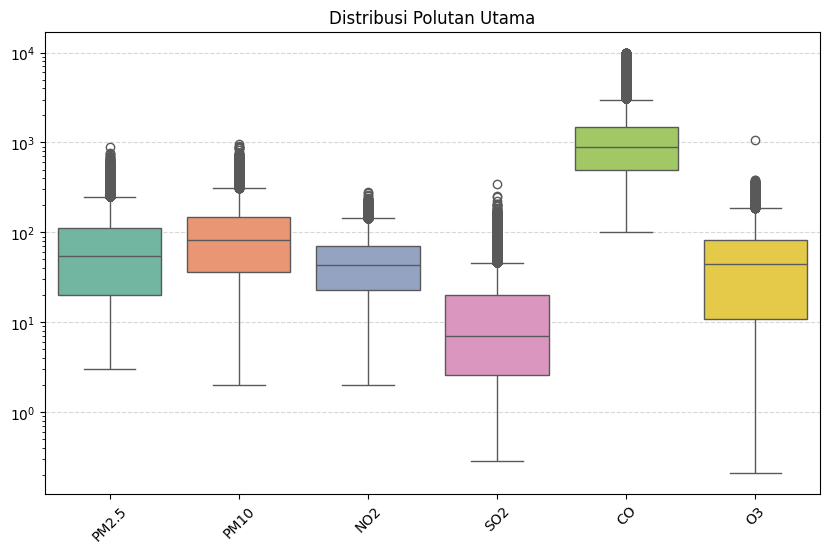

In [7]:
#1. Distribusi Polutan
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[pollutants],palette="Set2")
plt.title("Distribusi Polutan Utama")
plt.xticks(rotation=45)
plt.yscale("log")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()


**Insight**

*   Co dan PM10 memiliki rentang nilai outlier paling ekstrem salah satu sumber emisi terbesar
*   PM2.5 tetap polutan merupakan masalah kesehatan utama median tinggi dan outlier sering


*   Outlier tinggi menandakan polusi berulang





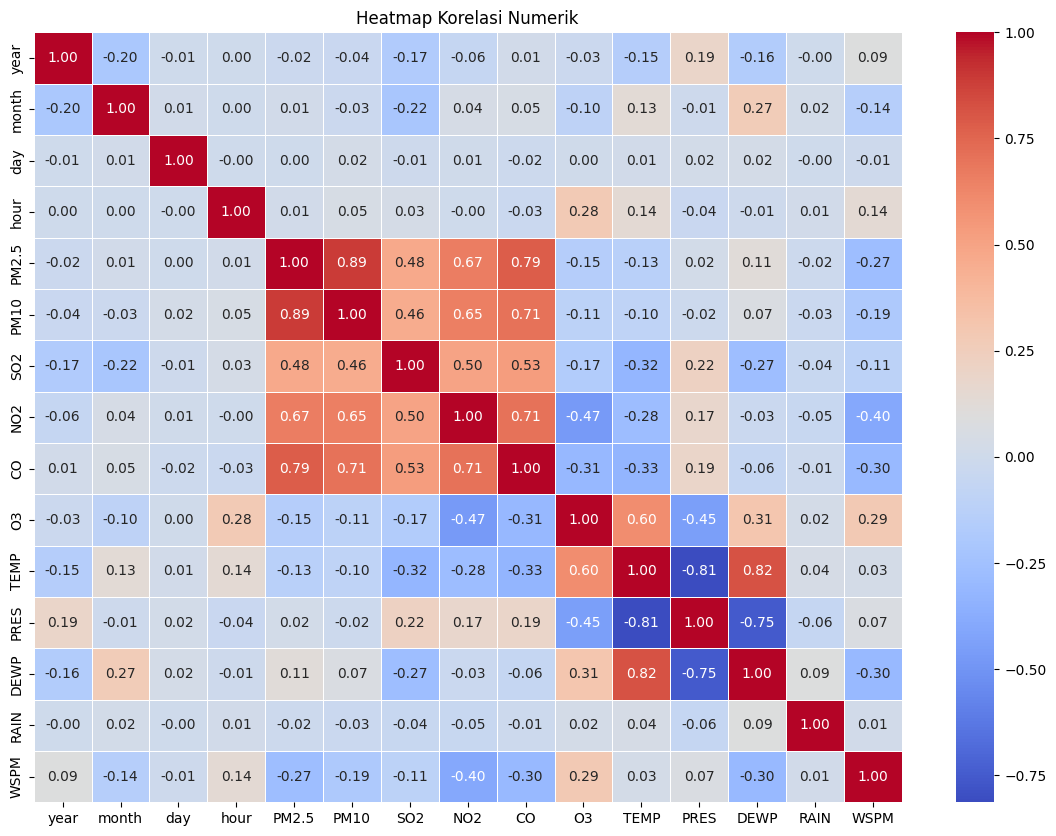

In [8]:
#2. Korelasi Antar Variabel
numeric_df = df.select_dtypes(include=['int64', 'float64'])
if "No" in numeric_df.columns:
    numeric_df = numeric_df.drop(columns=["No"])
plt.figure(figsize=(14, 10))
sns.heatmap(numeric_df.corr(), cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)
plt.title("Heatmap Korelasi Numerik")
plt.show()

**Insight**



*   PM2.5 sangat dipengaruhi oleh PM10, CO dan NO2
*   Angin (WSPM) menurunkan polusi , tekanan tinggi (PRES) meningkatkan polusi


*   Kondisi cuaca mempengaruhi polusi dibandingkan waktu
*   O3 berbeda dengan polutan lainnya naik saat panas , turun saat musim dingin





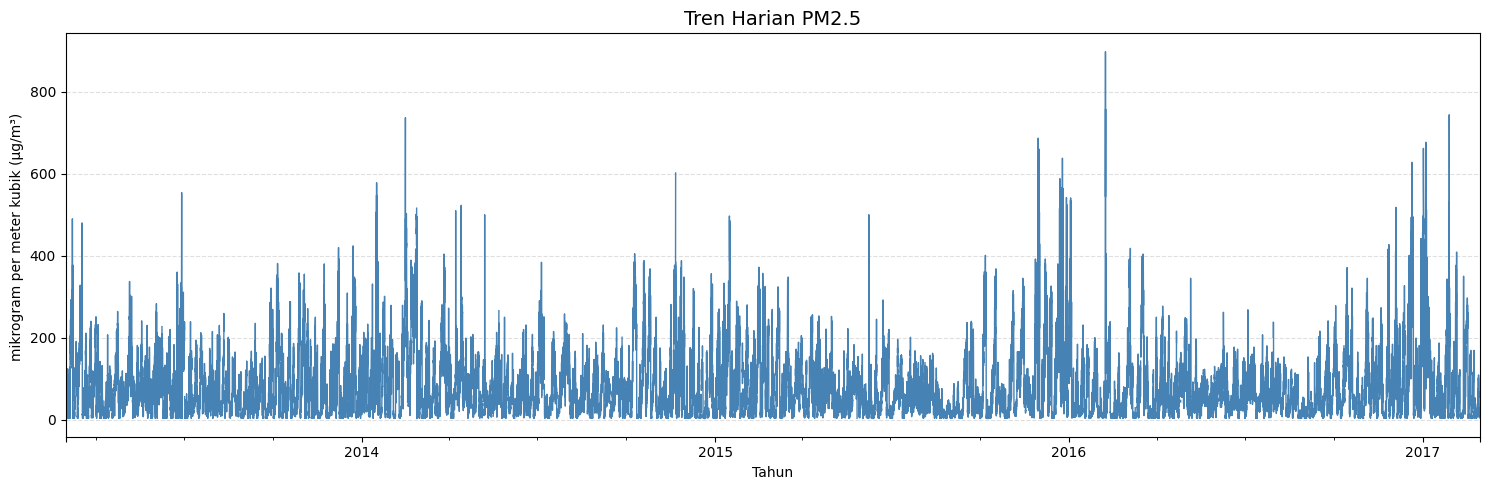

In [9]:
#3. Tren Harian PM2.5
plt.figure(figsize=(15, 5))
df["PM2.5"].plot(color="steelblue", linewidth=1)
plt.title("Tren Harian PM2.5", fontsize=14)
plt.xlabel("Tahun")
plt.ylabel("mikrogram per meter kubik (µg/m³) ")
plt.grid(axis="y", linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()

**Insight**



*   ada beberapa lonjakan ekstrem terutama di 2015-2016
*   Kualitas udara cenderung memburuk mendekati 2016 - 2017



**Insight**



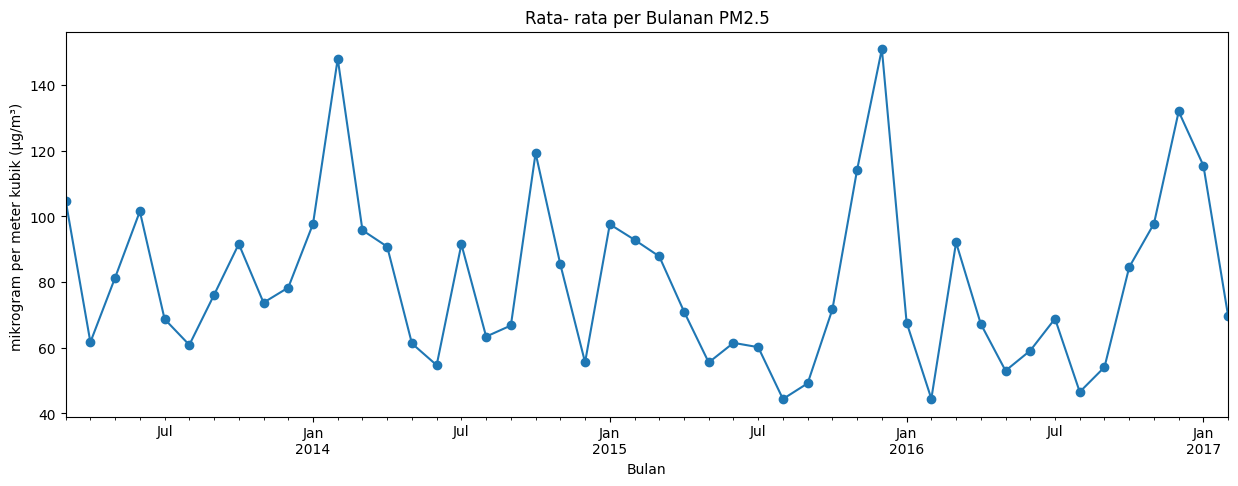

In [10]:
#4. Tren Bulanan
monthly_averages = df["PM2.5"].resample("ME").mean()

plt.figure(figsize=(15, 5))
monthly_averages.plot(marker='o')
plt.xlabel("Bulan")
plt.ylabel("mikrogram per meter kubik (µg/m³) ")
plt.title("Rata- rata per Bulanan PM2.5")
plt.show()


**Insight**



*   Tahun 2016 merupakan tahun dengan polusi bulanan terburuk
*   PM2.5 tinggi di musim dingin dan rendah di musim panas


*   Lonjakan ekstrem terjadi pada awal 2014, akhir 2015 dan awal 2016






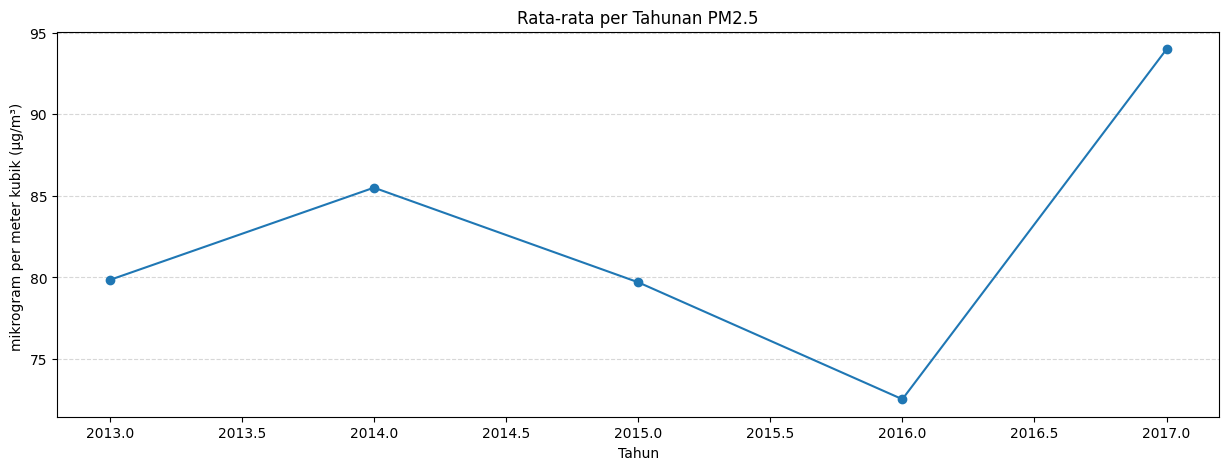

In [11]:
#5. Tren Tahunan
year_averages = df.groupby(df.index.year)['PM2.5'].mean()

plt.figure(figsize=(15, 5))
year_averages.plot(marker='o')
plt.xlabel("Tahun")
plt.ylabel("mikrogram per meter kubik (µg/m³) ")
plt.title("Rata-rata per Tahunan PM2.5")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()


**Insight**


*  Aktivitas polusi meningkat pada 2014, kemudian menurun hingga 2016 dan melonjak tajam pada 2017
*   2016 menjadi tahun dengan udara terbersih sedangkan tahun 2017 menjadi tahun terburuk


*   Pola tidak stabil karena pengaruh dari kondisi cuaca, musim dan aktivitas manusia






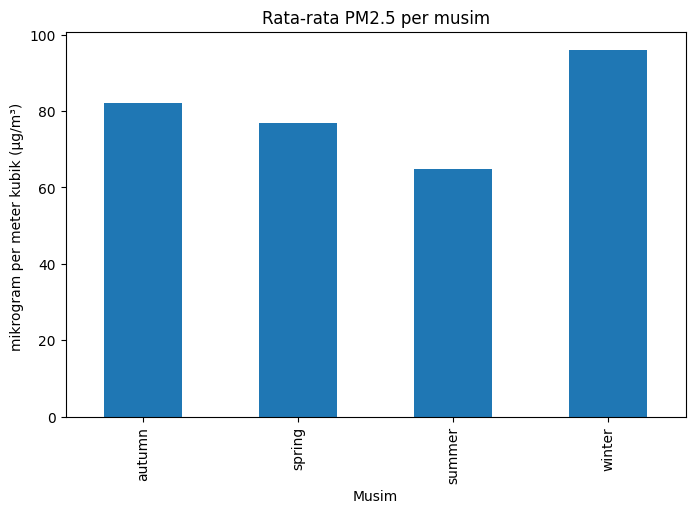

In [12]:
#6. Tren Musiman
df['month'] = df.index.month
df['season'] = df['month'].map({
    12: 'winter', 1: 'winter', 2: 'winter',
    3: 'spring', 4: 'spring', 5: 'spring',
    6: 'summer', 7: 'summer', 8: 'summer',
    9: 'autumn', 10: 'autumn', 11: 'autumn'
})

plt.figure(figsize=(8, 5))
df.groupby('season')['PM2.5'].mean().plot(kind='bar')
plt.xlabel("Musim")
plt.ylabel("mikrogram per meter kubik (µg/m³) ")
plt.title("Rata-rata PM2.5 per musim")
plt.show()


**Insight**


*   Polusi PM2.5 sangat dipengaruhi oleh musim
*   faktor musim sangat dominan


*   upaya pengendalian polusi harus diperkuat saat winter dan autumn






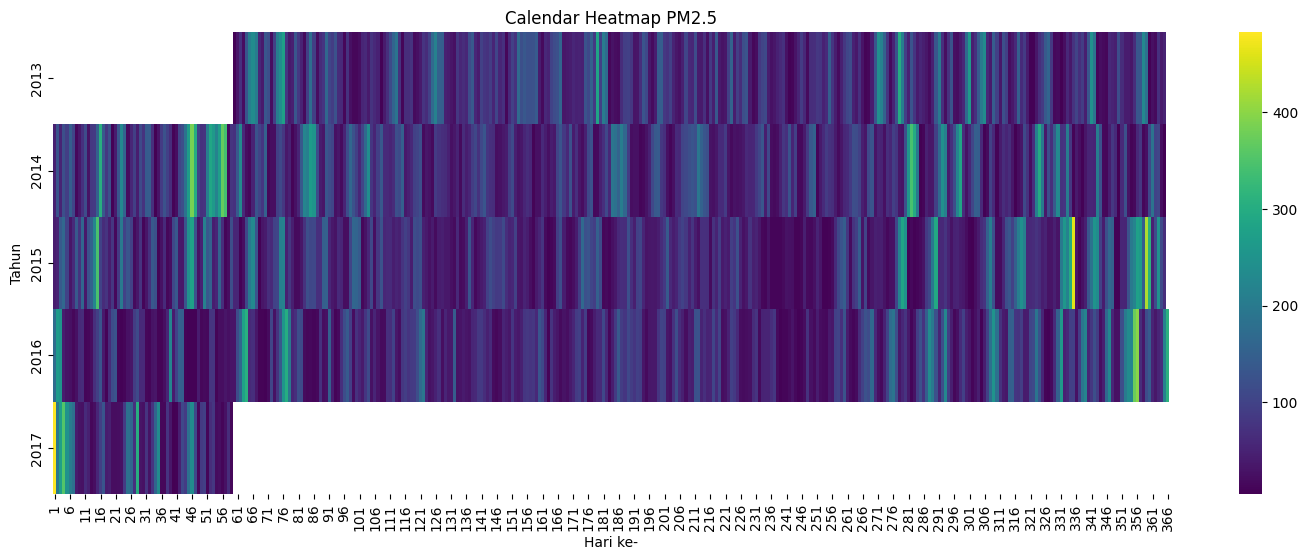

In [13]:
#7. Calendar Heatmap
df['day_of_year'] = df.index.dayofyear
calendar = df.pivot_table(
    values="PM2.5",
    index=df.index.year,
    columns="day_of_year"
    ).sort_index()

plt.figure(figsize=(18, 6))
sns.heatmap(calendar, cmap='viridis', linewidths=0)
plt.title("Calendar Heatmap PM2.5")
plt.xlabel("Hari ke-")
plt.ylabel("Tahun")
plt.show()


**Insight:**


*   Visualisasi ini membantu mendeteksi kejadian ekstrem dan pola tahunan yang tidak tampak pada grafik harian
* pola ini konsisten di hampir semua tahun 2013 - 2017



## Visualization & Explanatory Analysis

### Pertanyaan 1: Apakah terdapat nilai pm2.5 yang tergolong ekstrem (outlier) pada dataset?

Jumlah outlier pada PM2.5: outlier_count


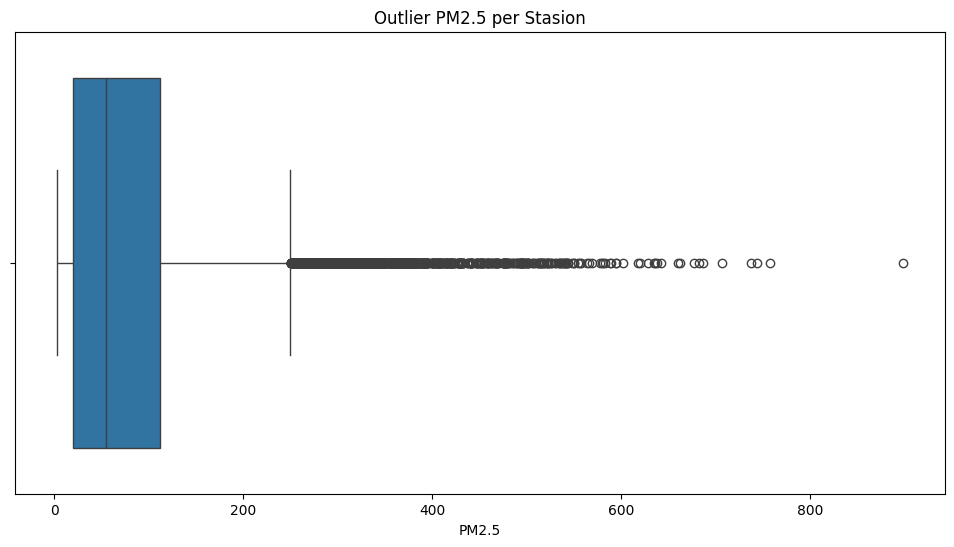

In [18]:
Q1 = df["PM2.5"].quantile(0.25)
Q3 = df["PM2.5"].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df['outlier_PM2.5'] = ((df['PM2.5']< lower )) | (df['PM2.5'] > upper).astype(int)

outlier_count = df['outlier_PM2.5'].sum()
print(f"Jumlah outlier pada PM2.5: outlier_count")

plt.figure(figsize=(12, 6))
sns.boxplot(x=df['PM2.5'])
plt.title("Outlier PM2.5 per Stasion")
plt.show()



**Insight**



*   Terdapat banyak nilai PM2.5 yang tergolong outlier, hasil boxplot menunjukkan banyak titik yang berada jauh di atas >300 mikrogram , beberapa mencapai 600-900 mikrogram per meter kubik
*   Distribusi PM2.5 condong ke kanan


*   Batas IQR menunjukkan bahwa outlier benar benar ekstrem






### Pertanyaan 2: Bagaimana perbandingan Rata-rata PM2.5 Antar Stasiun?

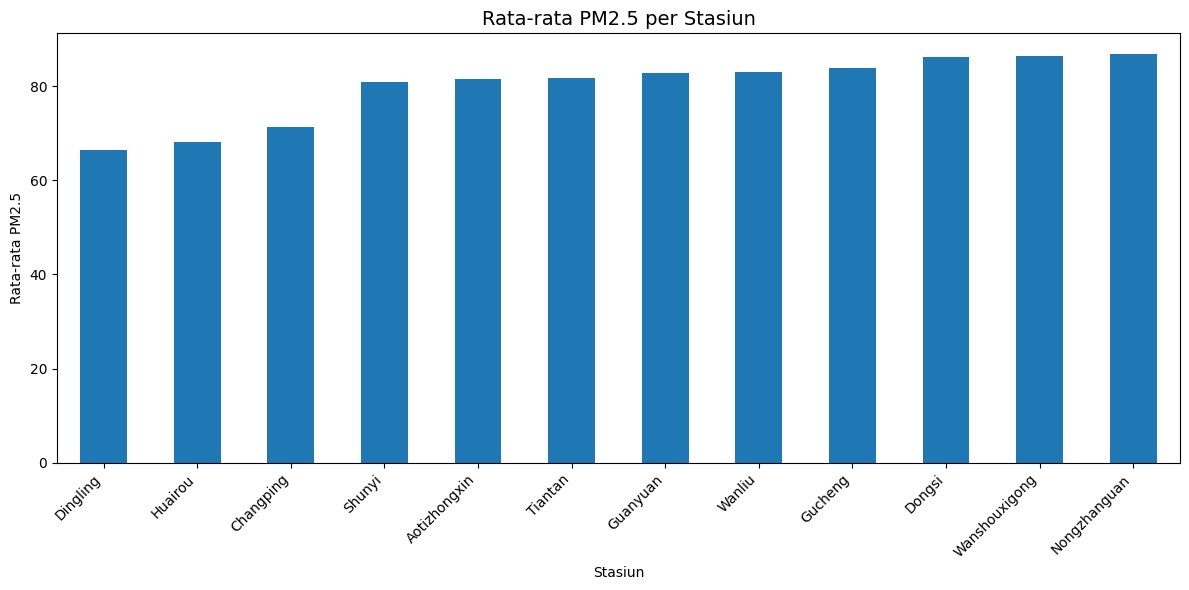

In [17]:
df['station'] = df['station'].astype('str')
station_averages = df.groupby('station')['PM2.5'].mean().sort_values()

plt.figure(figsize=(12, 6))
station_averages.plot(kind='bar')
plt.xlabel("Stasiun")
plt.ylabel("Rata-rata PM2.5")
plt.xticks(rotation=45, ha="right")
plt.title("Rata-rata PM2.5 per Stasiun", fontsize=14)
plt.tight_layout()
plt.show()

**Insight:**
- Terdapat selisih antara stasiun yang terendah di Dingling dan tertinggi di Nongzhanguan
- stasiun dengan rata-rata lebih tinggi seperti dongsi , wanshouxigong,Nongzhanguan berada di area perkotaan


*   Mayoritas stasiun memiliki rata-rata diatas 80



## Analisis Lanjutan (Opsional)

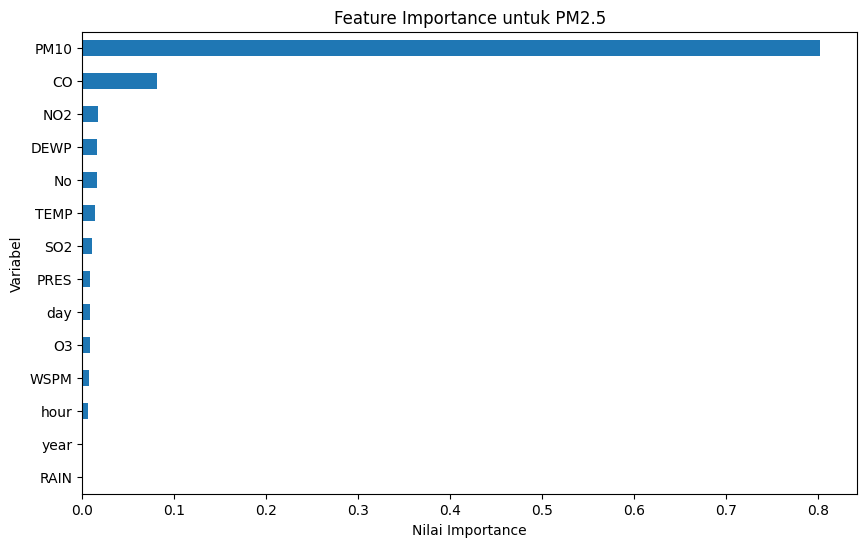

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor


num_cols = df.select_dtypes(include=['int64', 'float64']).columns
num_cols = num_cols.drop('PM2.5')

df[num_cols] = df[num_cols].fillna(df[num_cols].median())
df['PM2.5'] = df['PM2.5'].fillna(df['PM2.5'].median())


X = df[num_cols]
y = df['PM2.5']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

importance = pd.Series(model.feature_importances_, index=x_train.columns)

plt.figure(figsize=(10, 6))
importance.sort_values().plot(kind='barh')
plt.title("Feature Importance untuk PM2.5")
plt.xlabel("Nilai Importance")
plt.ylabel("Variabel")
plt.show()


## Conclusion

- Model menunjukkan bahwa PM2.5 paling kuat dipengaruhi oleh konsentrasi PM10, sementara faktor gas dan cuaca berperan sebagai faktor pendukung dengan dampak yang jauh lebih kecil
